<a href="https://colab.research.google.com/github/SHRESTA-YARABOLU/-LGMVIP--DataScience/blob/main/stockMarketPrediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [51]:
# LetsGroMore - August 2022
# Shresta Yarabolu - Data Science Intern
# Task 1.2 - Stock market prediction with python

In [ ]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import tensorflow as tf
from sklearn.preprocessing import MinMaxScaler
import warnings
warnings.filterwarnings("ignore")

In [ ]:
dataset_link = "https://raw.githubusercontent.com/mwitiderrick/stockprice/master/NSE-TATAGLOBAL.csv"
data = pd.read_csv(dataset_link)
data.head()

,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
0,2018-09-28,234.05,235.95,230.20,233.50,233.75,3069914,7162.35
1,2018-09-27,234.55,236.80,231.10,233.80,233.25,5082859,11859.95
2,2018-09-26,240.00,240.00,232.50,235.00,234.25,2240909,5248.60
3,2018-09-25,233.30,236.75,232.00,236.25,236.10,2349368,5503.90
4,2018-09-24,233.55,239.20,230.75,234.00,233.30,3423509,7999.55


In [ ]:
data.isnull().sum()

Date                    0
Open                    0
High                    0
Low                     0
Last                    0
Close                   0
Total Trade Quantity    0
Turnover (Lacs)         0
dtype: int64

In [ ]:
data['Date'] = pd.to_datetime(data['Date'])

In [ ]:
df = data.sort_values('Date')
df.head()

,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
2034,2010-07-21,122.1,123.00,121.05,121.10,121.55,658666,803.56
2033,2010-07-22,120.3,122.00,120.25,120.75,120.90,293312,355.17
2032,2010-07-23,121.8,121.95,120.25,120.35,120.65,281312,340.31
2031,2010-07-26,120.1,121.00,117.10,117.10,117.60,658440,780.01
2030,2010-07-27,117.6,119.50,112.00,118.80,118.65,586100,694.98


In [ ]:
df.reset_index(inplace=True)

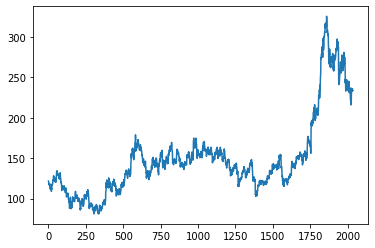

In [ ]:
plt.plot(df['Close'])

In [ ]:
df_close = df['Close']
df_close

0       121.55
1       120.90
2       120.65
3       117.60
4       118.65
         ...  
2030    233.30
2031    236.10
2032    234.25
2033    233.25
2034    233.75
Name: Close, Length: 2035, dtype: float64

In [ ]:
scaler = MinMaxScaler(feature_range=(0,1))

In [ ]:
df_close = scaler.fit_transform(np.array(df_close).reshape(-1,1))
df_close

array([[0.16584967],
       [0.16319444],
       [0.1621732 ],
       ...,
       [0.62622549],
       [0.62214052],
       [0.62418301]])

In [ ]:
training_size = int(len(df_close)*0.70)
test_size = len(df_close) - training_size
train, test = df_close[0: training_size,:], df_close[training_size : len(df_close),:1]

In [ ]:
def create_mat(ds, time_step = 1):
    dataX, dataY = [], []
    for i in range(len(ds)-time_step-1):
        a = ds[i:(i+time_step),0]
        dataX.append(a)
        dataY.append(ds[i + time_step, 0])
    return np.array(dataX), np.array(dataY)

In [ ]:
time_step = 100
X_train, y_train = create_mat(train, time_step)
X_test, y_test = create_mat(test, time_step)

In [ ]:
X_train.shape

(1323, 100)

In [ ]:
y_train.shape

(1323,)

In [ ]:
X_test.shape

(510, 100)

In [ ]:
y_test.shape

(510,)

In [ ]:
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM

In [ ]:
model = Sequential()
model.add(LSTM(50,return_sequences=True,input_shape=(100,1)))
model.add(LSTM(50,return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_3 (LSTM)               (None, 100, 50)           10400     
                                                                 
 lstm_4 (LSTM)               (None, 100, 50)           20200     
                                                                 
 lstm_5 (LSTM)               (None, 50)                20200     
                                                                 
 dense_1 (Dense)             (None, 1)                 51        
                                                                 
Total params: 50,851
Trainable params: 50,851
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.fit(X_train, y_train, validation_split=0.1, epochs= 60, batch_size=64, verbose = 1)

Epoch 1/60
19/19 [==============================] - 7s 151ms/step - loss: 0.0148 - val_loss: 0.0014
Epoch 2/60
19/19 [==============================] - 2s 107ms/step - loss: 0.0022 - val_loss: 0.0012
Epoch 3/60
19/19 [==============================] - 2s 106ms/step - loss: 9.3095e-04 - val_loss: 0.0011
Epoch 4/60
19/19 [==============================] - 2s 108ms/step - loss: 8.1976e-04 - val_loss: 0.0011
Epoch 5/60
19/19 [==============================] - 2s 105ms/step - loss: 7.9658e-04 - val_loss: 0.0010
Epoch 6/60
19/19 [==============================] - 2s 108ms/step - loss: 7.7299e-04 - val_loss: 0.0010
Epoch 7/60
19/19 [==============================] - 2s 106ms/step - loss: 7.5602e-04 - val_loss: 9.6847e-04
Epoch 8/60
19/19 [==============================] - 2s 107ms/step - loss: 7.7645e-04 - val_loss: 0.0010
Epoch 9/60
19/19 [==============================] - 2s 105ms/step - loss: 7.4214e-04 - val_loss: 9.4384e-04
Epoch 10/60
19/19 [==============================] - 2s 121ms/st

In [ ]:
predictions = model.predict(X_test)

In [ ]:
inv_predictions = scaler.inverse_transform(predictions)

In [ ]:
inv_predictions

array([[143.91032 ],
       [144.17432 ],
       [143.48744 ],
       [141.17044 ],
       [139.42519 ],
       [138.60916 ],
       [139.39145 ],
       [140.7936  ],
       [141.3962  ],
       [141.29944 ],
       [141.15498 ],
       [142.12358 ],
       [142.88063 ],
       [144.30463 ],
       [146.33554 ],
       [144.9815  ],
       [142.84302 ],
       [142.13179 ],
       [142.38455 ],
       [146.51588 ],
       [150.76674 ],
       [153.41174 ],
       [154.3622  ],
       [152.94002 ],
       [152.54248 ],
       [152.10963 ],
       [152.25568 ],
       [153.60938 ],
       [154.42668 ],
       [154.6583  ],
       [155.10664 ],
       [154.25717 ],
       [151.48698 ],
       [146.32507 ],
       [142.60632 ],
       [141.01288 ],
       [140.76721 ],
       [140.06293 ],
       [138.13991 ],
       [134.86418 ],
       [132.29004 ],
       [130.82503 ],
       [128.7396  ],
       [127.70497 ],
       [125.75704 ],
       [123.22331 ],
       [122.21932 ],
       [121.7

In [ ]:
import math
from sklearn.metrics import mean_squared_error

In [ ]:
m = math.sqrt(mean_squared_error(y_test, predictions))
print("The Mean Squared Error is: ", m)

The Mean Squared Error is:  0.02988887661557008
